# MNIST 손글씨 - Convolutional Neural Network ver.3
- Conv2D 2개
- MaxPooling 1개
- Dropout 2개

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의/설정/학습

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [11]:
model = Sequential([
                    Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=2), # parameter 개수가 줄어든다
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, verbose=0, callbacks=[checkpointer, early_stopping], batch_size=200)


Epoch 00001: val_loss improved from inf to 0.05548, saving model to ./model/best001-0.0555.hdf5

Epoch 00002: val_loss improved from 0.05548 to 0.04907, saving model to ./model/best002-0.0491.hdf5

Epoch 00003: val_loss improved from 0.04907 to 0.03793, saving model to ./model/best003-0.0379.hdf5

Epoch 00004: val_loss improved from 0.03793 to 0.03604, saving model to ./model/best004-0.0360.hdf5

Epoch 00005: val_loss improved from 0.03604 to 0.03468, saving model to ./model/best005-0.0347.hdf5

Epoch 00006: val_loss improved from 0.03468 to 0.03378, saving model to ./model/best006-0.0338.hdf5

Epoch 00007: val_loss did not improve from 0.03378

Epoch 00008: val_loss did not improve from 0.03378

Epoch 00009: val_loss did not improve from 0.03378

Epoch 00010: val_loss did not improve from 0.03378

Epoch 00011: val_loss improved from 0.03378 to 0.03349, saving model to ./model/best011-0.0335.hdf5

Epoch 00012: val_loss did not improve from 0.03349

Epoch 00013: val_loss did not improv

In [16]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best011-0.0335.hdf5')

In [17]:
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f'\n Test Accuracy: {acc:.4f}')

313/313 - 1s - loss: 0.0293 - accuracy: 0.9912

 Test Accuracy: 0.9912


In [18]:
# 검증셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

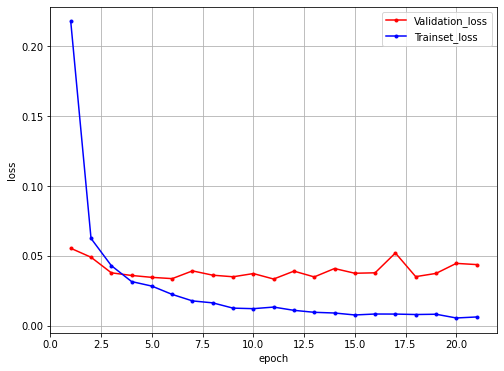

In [19]:
import matplotlib.pyplot as plt

x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validation_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()